## STA 4724: Homework 2 - Due Tuesday, Sep. 26 
**Instructions**: Finsih the assign by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name: Daniel Rodriguez**                     

**Your ID:4802087**

## Question 1
The cost of the maintenance of a certain type of tractor seems to increase with age. The file
*tractor.csv* contains ages (years) and 6-monthly maintenance costs for n = 17 such tractors.

**(a)** Read the data file.

In [1]:
import pandas as pd
tractor = pd.read_csv('tractor.csv')

display(tractor)

,age,cost
0,4.5,619
1,2.5,1049
2,2.5,1033
3,4.0,495
4,4.0,723
5,4.0,681
6,5.0,890
7,5.0,1522
8,5.5,987
9,5.0,1194


**(b)** Create a scatterplot of tractor maintenance cost versus age.

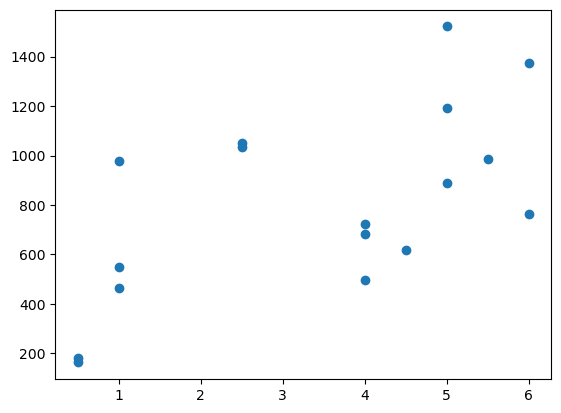

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x=tractor['age'],y=tractor['cost'])
plt.show()

**(c)** Using regression to fit the model:
$$\text{cost}=\beta_0+\beta_1 \text{age}$$
in two different ways.

Firstly, use python's bulit-in linear regression solver.

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(tractor['age'].values.reshape((-1, 1)),y=tractor['cost'])
predictions_sklearn = reg.predict(tractor['age'].values.reshape((-1, 1)))

Secondly, use close form solution of least square.

In [4]:
import numpy as np
X = np.c_[np.ones(tractor['age'].shape[0]), tractor['age']]

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(tractor['cost'])
predictions_closed_form = X.dot(beta)

**(d)** Add both fitted lines (in different color/style) to the scatterplot. They should give you the same solution.

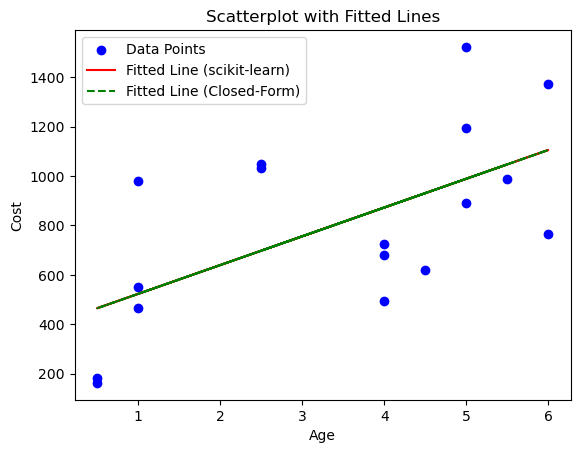

In [5]:
plt.scatter(tractor['age'], tractor['cost'], color='blue', label='Data Points')
plt.plot(tractor['age'], predictions_sklearn, color='red', label='Fitted Line (scikit-learn)')
plt.plot(tractor['age'], predictions_closed_form, color='green', linestyle='--', label='Fitted Line (Closed-Form)')
plt.xlabel('Age')
plt.ylabel('Cost')
plt.legend()
plt.title('Scatterplot with Fitted Lines')
plt.show()

**(e)** Suppose you are considering buying a tractor  that is three years old, what would you expect your 6-monthly maintenance costs to be?

**Type your answer here**:If your tractor is three years old you would expect you 6-monthly maintenance costs to be 650 - 700.

## Question 2
### Part 1
Let's generate a synthetic dataset for regression! It should have m = 150 data points and each has n = 75 dimensions (features).

**(a)** Set the random seed to be 0.

In [6]:
import numpy as np
np.random.seed(0)

**(b)** Let $X\in\mathbb{R}^{m\times n}$ be a random matrix using *numpy.random.rand()* function.

In [7]:
m, n = 150, 75
X = np.random.rand(m, n)
display(X)

array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.97676109, 0.60484552,
        0.73926358],
       [0.03918779, 0.28280696, 0.12019656, ..., 0.91948261, 0.7142413 ,
        0.99884701],
       [0.1494483 , 0.86812606, 0.16249293, ..., 0.27354203, 0.79804683,
        0.18563594],
       ...,
       [0.02972321, 0.96679304, 0.42879515, ..., 0.74254663, 0.05848812,
        0.02318131],
       [0.75361727, 0.12952377, 0.81188567, ..., 0.17014208, 0.26223898,
        0.85816892],
       [0.32394001, 0.88894006, 0.62976939, ..., 0.4188705 , 0.17694275,
        0.11363943]])

**(c)** Set the first 10 components of $\hat{\beta}$ to be some random values between $-10$ and $10$, and all the other components to zero. 

Hint: Read what *numpy.random.rand()* generates, and how you generate random numbers in a different interval.

In [8]:
beta_hat = np.zeros(n)
beta_hat[:10] = np.random.uniform(-10,10,10)
display(beta_hat)

array([-3.33907048, -4.30102186, -2.64543987, -8.47634449, -5.47961583,
        0.30633366,  9.83226175, -1.68473976, -1.73815895, -4.31755851,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

**(d)** Computer $Y=X\hat{\beta}+\varepsilon$ where $\varepsilon\in\mathbb{R}^{m\times 1}$ is a random noise vector generated using *numpy.random.randn()* with mean 0 and standard deviation 0.1.

In [9]:
epsilon = np.random.normal(0,0.1,m)
Y = X.dot(beta_hat) + epsilon
display(Y)

array([-13.66479612,  -4.39562355,  -4.18526222, -18.31518361,
       -10.10506674, -15.21647569, -10.26077889,  -8.05030539,
        -7.61932897,  -8.40585834,  -9.58375603, -18.4171525 ,
        -9.96504441,  -7.31944912, -10.74858777, -16.43834087,
       -17.62400215, -11.24689894, -17.52470791, -18.35088157,
       -12.11911244, -10.88958466,  -5.86392185,  -5.67323488,
        -7.51632215,  -9.6974837 ,  -7.59934395,  -5.16669687,
       -10.60097878, -23.66923268, -12.67354666, -15.67615523,
       -15.69812543,  -8.55264571,  -8.8630824 , -20.97825028,
       -19.0365018 , -10.16920262,  -8.60159322,  -2.26307849,
       -12.83269445, -12.01093885, -14.18790248, -11.51250449,
       -11.39605859,  -9.91851804, -13.07767105,  -9.69288562,
       -12.59228483, -16.72859152, -19.37779607, -11.54191111,
        -3.85581622,  -7.14135322,  -8.61098753, -12.98720609,
        -4.31942858, -10.12955417, -15.01372514,  -7.95666542,
       -13.82599984, -17.15871143,  -5.03397752,  -6.33

Note that the problem we generated here implicitly assume the interception (i.e., $\beta_0$ in textbook) is 0. 

### Part 2
We know the problem we generated above has a sparse solution. So we should solve it with lasso regression. Assume the user has the prior knowledge about the interception is 0. This we don't have to add the column of 1 in front of $X$.

**(a)** Solve the lasso regression problem with $\lambda=0.00001$.

In [10]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.00001)
clf.fit(X,Y)

Lasso(alpha=1e-05)

**(b)** Use 10-folder cross validation to find the best regularization parameter between $0$ and $1$.

In [11]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': np.linspace(0.00001,1,500)}
clf_cv = GridSearchCV(Lasso(), parameters, cv=10, n_jobs=-1)
clf_cv.fit(X,Y)
print("LASSO optimal λ = ",clf_cv.best_params_['alpha'])

LASSO optimal λ =  0.002013987975951904


<font color = blue> opted for 0.00001 instead of 0 since the gridsearch reccomended linear regression and selected a 𝜆=0. </font>

**(c)** Solve the lasso regression problem again with the best regularization parameter.

In [12]:
clf_opt = Lasso(alpha=clf_cv.best_params_['alpha'])
clf_opt.fit(X,Y)
beta_est = clf_opt.coef_

**(d)** Compare the estimated $\beta_{\text{est}}$ with the ground truth $\hat{\beta}$ by computing $\|\beta_{\text{est}}-\hat{\beta}\|_2$. The distance should be small.

In [13]:
display(np.linalg.norm(beta_est - beta_hat))

0.12586308466937807

## Question 3
In 1988, US cattle producers voted on whether or not to each pay a dollar per head towards the marketing campaigns of the American Beef Council. To understand the vote results, the Montana state cattlemen's association looked at the effect of the physical size of the farm and the value of the farms' gross revenue on voter preference. *beef.csv* consist of the vote results (YES in %), average SIZE of farm (in hundred acres), and average VAL of products sold annually by each farm (in thousand dollors) for each of Montana’s 56 counties.

**(a)** Read the data file.

In [14]:
beef = pd.read_csv('beef.csv')
display(beef)

,YES,SIZE,VAL
0,85.9,45.2,122
1,65.0,58.5,121
2,74.9,52.5,81
3,72.5,24.0,74
4,76.6,10.5,54
5,62.3,50.6,51
6,76.9,17.4,88
7,80.1,28.8,124
8,70.7,60.9,101
9,87.2,21.7,60


**(b)** Use Multivariate Linear Regression to fit YES with SIZE and log(VAL) as the regressors.

In [15]:
from sklearn.linear_model import LinearRegression

beef['log(VAL)'] = np.log(beef['VAL'])

reg = LinearRegression()
reg.fit(beef[['SIZE','log(VAL)']], beef['YES'])

LinearRegression()

**(c)** Is this a good fit? Numerically check via a sutiable statistics test.

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = reg.predict(beef[['SIZE','log(VAL)']])

display(r2_score(beef['YES'],y_pred))
display(mean_squared_error(beef['YES'],y_pred))

0.26064628648318366

101.51795891319183

<font color=blue> Based on the results with $R^2 = 0.2606$ and $\text{MSE} = 101.5179$ means that 26.06% of the variance can be explained in the model. And without other models to compare the MSE would not yield any conclusions or indications.

**(d)** In this dataset, what fact may potentially be a probelm for our regression analysis?

Hint: Does the effect of SIZE change depending on log(VAL)?

**Type your answer here**: The potential problem in this dataset could be the lack of an interaction term between 'SIZE' and 'log(VAL)' where if there were to be a significant interaction between these two, then the model might not accurately capture the underlying relationship between predictors and response variable. The use of the statsmodel packages and its enhanced regression data output could give insight into this as well as further testing with various models.